# 📊 Análise Exploratória de Dados (EDA) - Precificação de Aluguéis em Nova York  
        
        **Autor:** Luciano Arruda
        **Data:** `2025-02-07`  
        **Objetivo:** Explorar e entender padrões no dataset de aluguéis em Nova York para identificar fatores que influenciam o preço.  

        ## 🔍 Etapas da Análise  
        1. **Carregamento e inspeção do dataset** 📂  
        2. **Identificação de valores ausentes** 🚨  
        3. **Distribuição de preços e outras variáveis** 📈  
        4. **Correlação entre variáveis** 🔗  
        5. **Distribuição geográfica dos imóveis** 🏙  
        6. **Conclusões e insights** ✅  
        

In [4]:
# 📥 Importação das Bibliotecas
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações visuais
warnings.filterwarnings("ignore")
sns.set(style="whitegrid", context="notebook")

# Diretório dos dados
data_path = "../data/raw/teste_indicium_precificacao.csv"


In [5]:
# 📂 Carregamento do Dataset
try:
    df = pd.read_csv(data_path)
    print("✅ Dataset carregado com sucesso!")
except Exception as e:
    print(f"❌ Erro ao carregar o dataset: {e}")


✅ Dataset carregado com sucesso!


## 📋 Estrutura e Resumo dos Dados  
        
        Vamos explorar a estrutura do dataset e entender suas colunas, tipos de dados e estatísticas básicas.
        

In [6]:
# 📊 Informações Gerais do Dataset
df.info()
df.head()  # Exibe as primeiras linhas do dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


## 🚨 Análise de Valores Ausentes  

        Verificamos a presença de valores ausentes para entender se há necessidade de tratamento antes da modelagem.
        

In [7]:
# 🔍 Contagem de Valores Ausentes
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


nome                  16
host_name             21
ultima_review      10052
reviews_por_mes    10052
dtype: int64

## 💰 Distribuição de Preços  

        Exploramos a distribuição dos preços dos imóveis, identificando possíveis outliers e padrões.
        

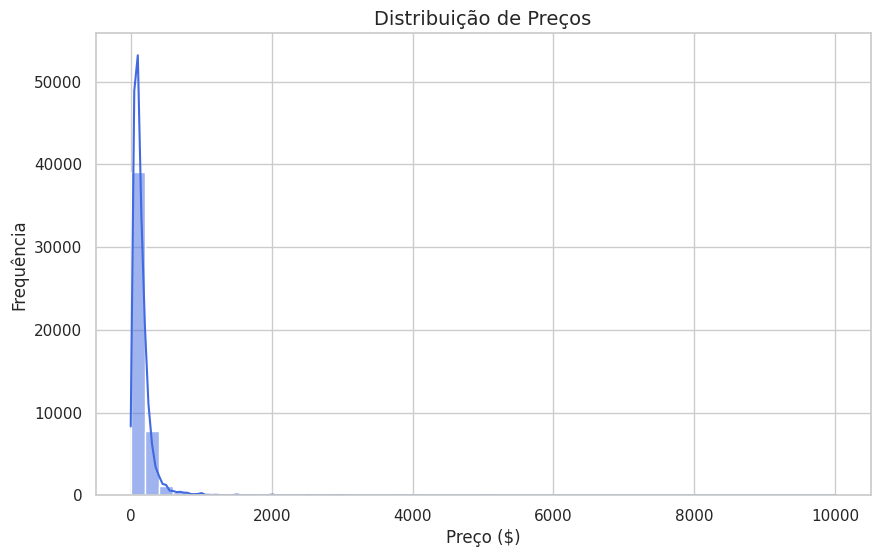

In [8]:
# 📈 Histograma da Distribuição de Preços
plt.figure(figsize=(10,6))
sns.histplot(df['price'].dropna(), bins=50, kde=True, color='royalblue')
plt.title("Distribuição de Preços", fontsize=14)
plt.xlabel("Preço ($)", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.show()


## 🔄 Transformação Logarítmica dos Preços  

        Como há muitos outliers, aplicamos uma transformação logarítmica para normalizar a distribuição.
        

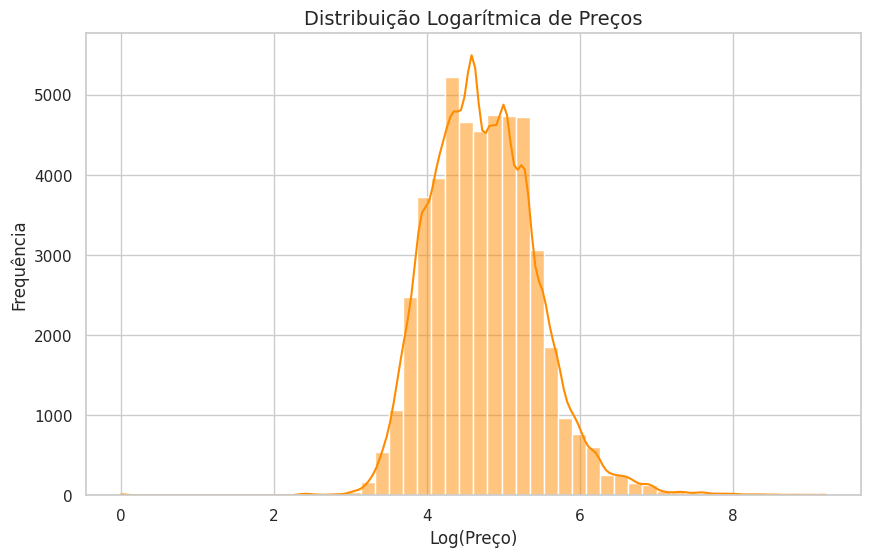

In [9]:
# 🔢 Aplicando Logaritmo nos Preços
df["price_log"] = np.log1p(df["price"])

# 📈 Histograma após transformação logarítmica
plt.figure(figsize=(10,6))
sns.histplot(df['price_log'].dropna(), bins=50, kde=True, color='darkorange')
plt.title("Distribuição Logarítmica de Preços", fontsize=14)
plt.xlabel("Log(Preço)", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.show()


## 🔗 Matriz de Correlação  

        Investigamos a relação entre variáveis numéricas para identificar fatores que impactam o preço.
        

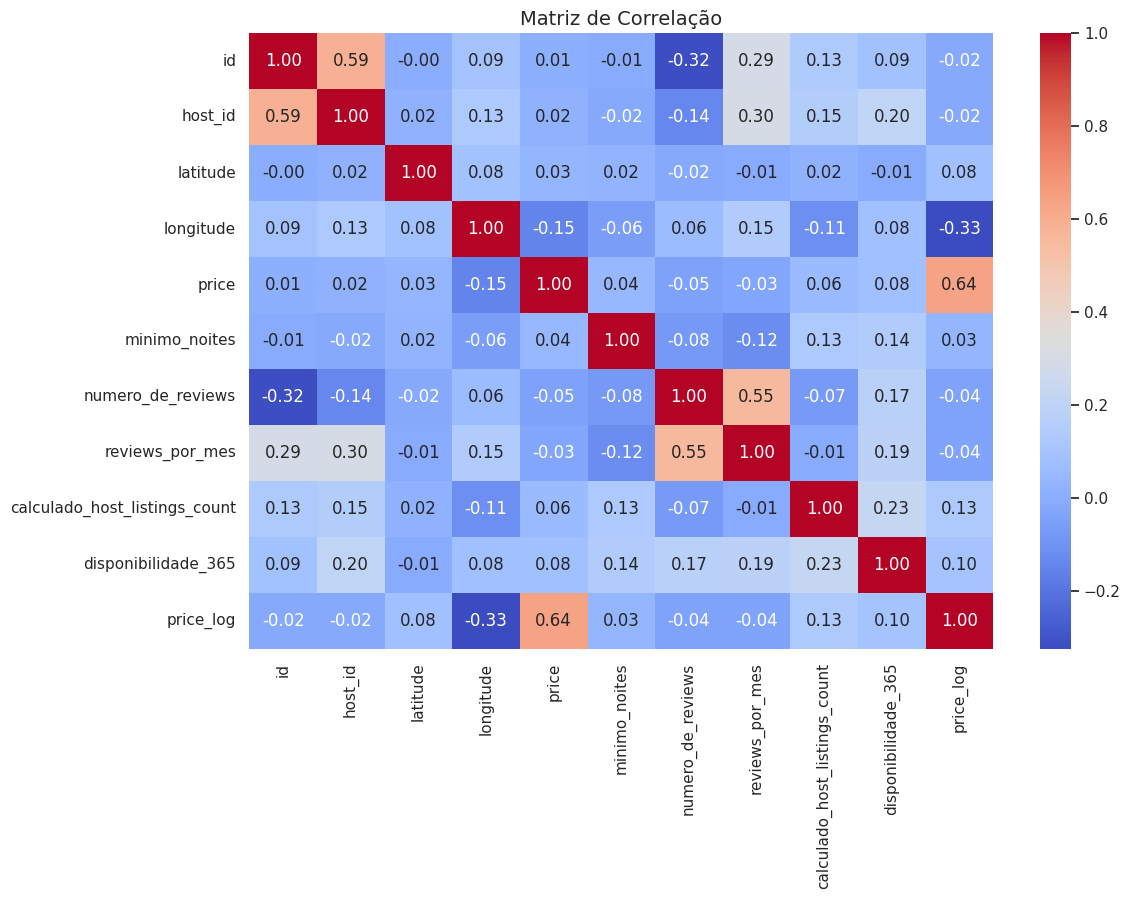

In [10]:
# 🔥 Matriz de Correlação
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação", fontsize=14)
plt.show()


## 🌍 Distribuição Geográfica dos Imóveis  

        Visualizamos a localização dos imóveis no mapa da cidade.
        

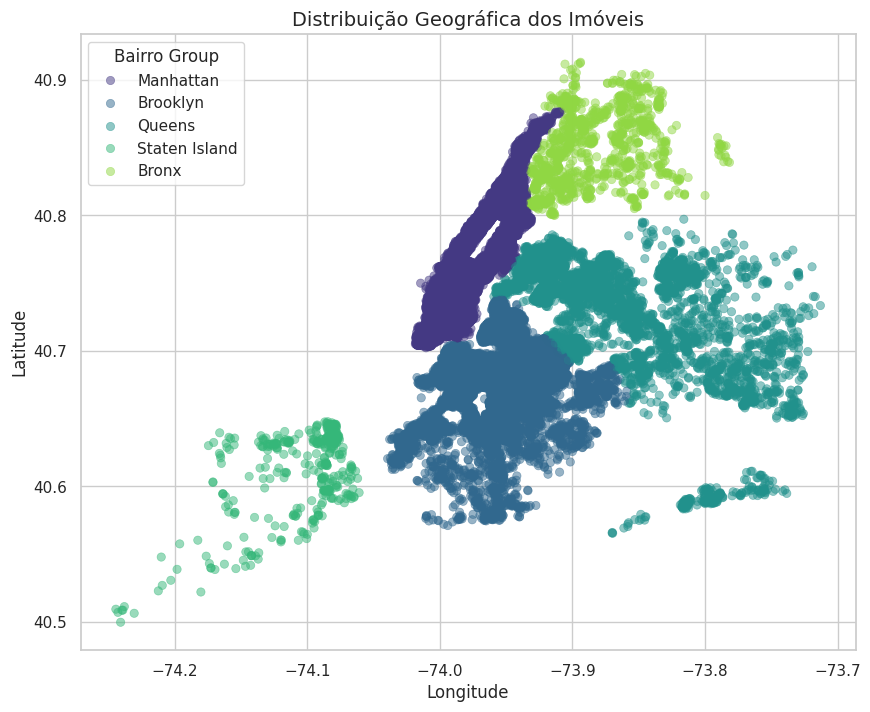

In [11]:
# 📍 Scatterplot Geográfico
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['bairro_group'],
                alpha=0.5, edgecolor=None, palette="viridis")
plt.title("Distribuição Geográfica dos Imóveis", fontsize=14)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.legend(title="Bairro Group", loc='best')
plt.show()


## ✅ Conclusões e Insights  

        📌 **Principais Descobertas:**  
        - A maioria dos preços está abaixo de $500, mas há outliers acima de $10.000.  
        - A transformação logarítmica melhora a distribuição dos preços.  
        - A correlação entre preço e outras variáveis numéricas é baixa, sugerindo que fatores externos influenciam mais o valor do aluguel.  
        - Manhattan e Brooklyn possuem maior oferta de imóveis.  
        - A maioria dos aluguéis são para apartamentos inteiros.  

        📢 **Recomendações:**  
        - Investidores devem priorizar **Manhattan e Brooklyn** devido à alta demanda.  
        - Preços devem ser analisados considerando localização e fatores qualitativos.  